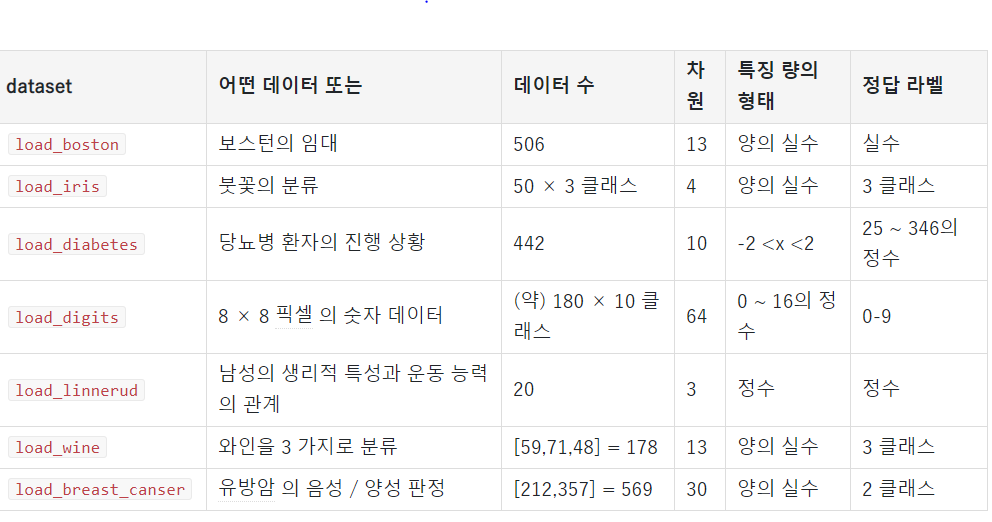

4. 기계 학습시 데이터를 생성하고 변형 모델에 입력할 경우 3가지 상황
  - 기존 데이터 액세스 하는 방법
  - 랜덤 데이터 생성하는 방법 : make_000으로 시작되는 함수로 데이터 로드
  - model에 데이터를 입력할 때 구조와 대체 데이터 저장하는 방법 : fetch_000 으로 시작되는 함수로 데이터 로드
  
5. X, Y [출력 변수] : 데이터 형식의 정답 레이블에 따라 보전 방법이 다르다(기존 데이터 액세스 하는 방법)
    1) 정답 레이블이 실수인 경우 : ex) boston의 데이터 형식
       data : 데이터에 포함된 벡터값
       feture_names : 각 요소의 이름
       target : 실수
       
    2) 정답 레이블이 클래스인 경우 : ex) iris의 데이터 형식
       data : 데이터에 포함된 벡터값
       feture_names : 각 요소의 이름
       target : 클래스(범주형 변수)
       target_names : 클래스이름
       
6. 랜덤 데이터 생성하는 방법 : make_000로 시작하는 함수가 호출되는 데이터로 매개변수를 조절해서 레이블이 있는 데이터를 생성할 수 있다.
  - dataset                     데이터 종류             데이터 수       차원             클래스 수       데이터 분포 조정
  - make_blobs                  가우시안 데이터생성     n_samples       n_features       centers         cluster_std, cluster_box
  - make_classification         n-class 분류용데이터    n_samples       n_features       n_classes       많다, 복잡하다
  - make_gaussian_quantiles     분포생성                n_samples       n_features       n_classes       mean, cov
  - make_circles                원형 분포               n_samples       2차원            2               factor
  
7. 기계학습의 흐름
데이터 수집 -> 전처리 -> 데이터 분할 -> 학습하기 -> 테스트 평가하기
1) 데이터 분할 : model_selection.train_test_split

2) 학습하기(다양한 패턴의 알고리즘) : sklearn.ensemble.RandomForestClassifier 등의 sklearn.ensemble.*
    - ensemble(집단학습) : 미학습(학습이 되어있지 않은) 데이터에 대한 예측 능력을 평가하는 것
                         : 단일학습, 융합
                         : 복잡한 학습 -> 독립적, 간단한 학습 -> 순차적
                         : 랜덤포레스트, 부트스트랩의 두가지 관점으로 나뉜다.
             
    - RandomForest는 무슨 알고리즘?
        1) 부트스트랩 표본 추출을 복원 추출한다 : 학습데이터에서 n개의 샘플을 무작위로 선택
        2) 부트스트랩의 표본에서 결정 나무를 생성 : 임의의 d개의 특징된 양을 추출한다(목적함수에 따라 최적의 분할이 되는 특징량을 사용하여 노드를 분할하는 작업)
        3) 예측된 결과를 리턴 : 레이블로 할당한다.
        ex) 100명과 찍은 친구와의 사진이있다. 그 중 홍길동, 정길동, 박길동을 임의로 추출해서 베프인지 아닌지를 판별하고 싶다.
            홍길동은 2단계 분류기를 거쳤더니 베프레이블. 정길동, 박길동은 2단계의 분류기를 거쳤더니 베프가 아니다
            엔코아와 내가 사진을 찍어서 테스트를 했더니 베프가 아니래..

3) 테스트 평가하기 : sklearn.metrics.accuracy_score 등의 sklearn.metrics.*

* 입출력 함수가 정해져 있기 때문에 데이터 전체 구현하기전에 체크
  - model.fit(X,y), model.fit(X), model.predict(X) : 모델에서 테스트 까지
  
  
--------------> 머신러닝
1. 다섯단계의 의미
2. 데이터셋 3가지
3. sklearn.metrics 모듈의 메소드(클래스 분류결과) TP(true positive), TN(true negative), FP(false positive), FN(false negative)
    - 정답률 accuracy_score() / 적합율 precision_score() /  재현율 recall_score() / 평가지표 산출률 classification_report()
    - F1 measure 값 f1_score() / 매크로 평균, 마이크로 평균값, 가중평균값 / 클래스 분류지표
4. 단계별 코드를 전체 구현하면서 알고리즘 패턴을 숙지한다


===================================================================================================================================

8. ML - sklearn.metrics의 메소드를 살펴보자
    1) confusion matrix형태의 데이터를 관리한다 : 클래스 분류 결과를 "실제 클래스"와 "예측 클래스"를 축으로 가진 형태.
        실제 클래스, 예측 클래스(두 값의 분류) -> 4개의 종류로 나뉜다
                                   실제 클래스         예측 클래스
         - TP(true positive)           T                    T       (정답)
         - TN(true negative)           F                    F       (정답)
         - FP(false positive)          F                    T       (오답)
         - FN(false negative)          T                    F       (오답)
         
    case 1 ----------->      
                             Predicted(예측)
                             negative    positive
     Actual   negative         TN          FP
     (실제)   positive         FN          TP
     
     
    case 2 ----------->  0 = negative, 1 = positive  
                             Predicted(예측)
                      0           1
     Actual   0      TN          FP
     (실제)   1      FN          TP
     
    case 3 ----------->  A = negative, B = positive
                             Predicted(예측)
                      A           B
     Actual   A      TN          FP
     (실제)   B      FN          TP                    ======> TN, FP, FN, TP
     
    case 4 ----------->  A = positive, B = negative
                             Predicted(예측)
                      A           B
     Actual   A      TP          FN
     (실제)   B      FP          TN                    ======> TP, FN, FP, TN
     
    case 5 ----------->  0 = positive, 1,2 = negative  labels=[0,1,2]
                             Predicted(예측)
                      0      1      2
     Actual   0      TP      FN     FN
     (실제)   1      FP      TN     TN
              2      FP      TN     TN
   
    2) confusion_matrix() 생성해서 사용한다.
       - sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
       
    3) 정답률 확인. accuracy_score()
        (TP + TN + FP + FN) / (TP + TN)
        
    4) 적합율(PPV : Positive Predictive Value). precision_score()
        precision = TP / (TP + FP)
        FP가 커지면 적합율은 작아진다.
        
    5) 재현율. recall_score()
        recall = TP / (TP + FN)
        FN가 커지면 재현율은 작다
        
    6) F1 measure 값 f1_score()
        case 1 : precision + recall / 2 * precision * recall
        case 2 : 2 * TP * FP + FN / 2 * TP
        
9. train_test_split() : ndarray 객체 및 목록 등을 둘로 나누어 리턴하는 기능의 함수. 머신러닝 데이터를 훈련(학습)과 테스트로 분할한다.
   - 데이터 검증방법 3가지
   
      - 홀드 아웃 검증 : 데이터를 훈련 데이터와 테스트 데이터를 분할 한 다음 테스트 데이터를 사용하지 않는 방법, 테스트 데이터는 평가로 사용
      
      - 교차검증(n겹) : 데이터를 n개의 그룹으로 나누어서 원하는 그룹을 하나 선택한 후 나머지 데이터를 훈련데이터로 사용한다. 원하는 그룹을 하나 선택한 것은 테스트 평가. 테스트데이터에서 정밀도에 평균, 표준편차를 구해서 평가 실행(5~10내외로 그룹을 나눈다)
      
      - LOOCV(Leave-one-out Cross-Validation) : 교차 검증시에 그룹개수와 데이터수가 같을 때 사용하는 검증방법

In [ ]:
# 정답 레이블이 실수인 경우 : ex) boston의 데이터 형식
from sklearn import datasets

data = datasets.load_boston()
print('data shape :', data.data.shape)
print('feature_names :', data.feature_names)
print('target :', data.target)

In [4]:
# 정답 레이블이 클래스인 경우 : ex) iris의 데이터 형식
from sklearn import datasets

data = datasets.load_iris()
print('data shape :', data.data.shape)
print('feature_names :', data.feature_names) 
print('target :', data.target)  # 범주형 변수
print('class name :', data.target_names)

data shape : (150, 4)
feature_names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
class name : ['setosa' 'versicolor' 'virginica']


In [5]:
# 정답 레이블이 클래스인 경우 : ex) wine의 데이터 형식
from sklearn import datasets

data = datasets.load_wine()
print('data shape :', data.data.shape)
print('feature_names :', data.feature_names) 
print('target :', data.target)  # 범주형 변수는 순차 알고리즘의 영향을 받아 정렬 된 값을 리턴한다.
print('class name :', data.target_names)

data shape : (178, 13)
feature_names : ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
target : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
class name : ['class_0' 'class_1' 'class_2']


In [9]:
from sklearn.utils import shuffle

x,y = shuffle(data.data, data.target, random_state=0)
print('target class :',y)

target class : [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2 0 1 2 2 1 2 2 0 1 2 1 1 2 1 0 1 1 1 0 0
 1 1 2 2 1 1 1 2 2 0 2 1 1 1 1 1 0 0 1 0 2 0 2 0 0 1 0 1 1 0 2 1 0 1 1 1 2
 0 2 2 0 0 1 2 0 0 1 1 0 0 0 2 1 0 1 2 0 1 2 2 0 0 2 0 2 1 0 0 1 0 2 1 2 0
 2 2 2 0 1 1 1 1 2 2 1 1 0 1 2 2 0 0 2 1 1 1 0 0 0 1 1 1 0 2]


In [12]:
# 사용자 랜덤 데이터 생성
data, target = datasets.make_multilabel_classification(n_samples=100, n_features=10, n_classes=5, n_labels=3)
print(type(data), type(target))
print('data :', data[0])
print('label :', target[0])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
data : [2. 4. 5. 0. 7. 0. 2. 3. 8. 2.]
label : [1 1 1 1 0]


In [16]:
# 데이터를 가지고 학습 -> 평가까지 전체 흐름을 살펴보자
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # 지표를 지정해서 n개의 결정나무 앙상블 학습 - 정밀도를 구현할 때 사용
from sklearn.metrics import accuracy_score

# 1. 데이터 로드
iris = datasets.load_iris()
data, target = iris.data, iris.target
data, target

# 2. 학습과 테스트로 나눈다
data_train, data_test, target_train, target_test = train_test_split(data, target, train_size=0.8, random_state=1)

# 3. 모델 지정 = 알고리즘 종류
model = RandomForestClassifier()

# 4. 학습
model.fit(data_train, target_train)

# 5. 테스트 및 평가
target_pred = model.predict(data_test)
print(accuracy_score(target_test, target_pred))  # 정답률을 계산한다.
# 정답률 accuracy_score() / 적합율 precision_score() /  재현율 recall_score() / 평가지표 산출률 Classification_report()
# F1 measuere 값 f1_score() / 매크로 평균, 마이크로 평균값, 가중평균값 / 클래스 분류지표

0.9666666666666667


In [20]:
# 기본 클래스 y를 이용한 메소드를 살펴보자
from sklearn.metrics import confusion_matrix

y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]
'''
0,0 : 1개
0,1 : 4개
1,0 : 3개
1,1 : 2개
'''
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(type(cm))

print(cm.flatten())  # 1차원으로 풀자
tn, fp, fn, tp = cm.flatten()
print(tn)
print(fp)
print(fn)
print(tp)

[[1 4]
 [3 2]]
<class 'numpy.ndarray'>
[1 4 3 2]
1
4
3
2


In [21]:
# 단어로 구현해보자
from sklearn.metrics import confusion_matrix

y_true_ab = ['A','A','A','A','A','B','B','B','B','B']
y_pred_ab = ['A','B','B','B','B','A','A','A','B','B']
'''
A,A : 1개
A,B : 4개
B,A : 3개
B,B : 2개
'''

print(confusion_matrix(y_true_ab, y_pred_ab))

[[1 4]
 [3 2]]


In [24]:
print(confusion_matrix(y_true_ab, y_pred_ab, labels=['B','A']))  # labels는 축의 순서를 지정(TP, FN, FP, TN) 
# 기본은 (TN, FP, FN, TP)

[[2 3]
 [4 1]]


In [ ]:
'''
[[00  01]
 [10  11]]
 
00 01 02
10 11 12
20 21 22
'''
1  2  0
0  2  1
0  0  3

In [26]:
y_true_m = [0,0,0,1,1,1,2,2,2]
y_pred_m = [0,1,1,1,1,2,2,2,2]
print(confusion_matrix(y_true_m, y_pred_m))

[[1 2 0]
 [0 2 1]
 [0 0 3]]


In [30]:
print(confusion_matrix(y_true_m, y_pred_m, labels=[2,1]))  #  22 21 12 11
print(confusion_matrix(y_true_m, y_pred_m, labels=[0,2]))  #  00 02 20 22

[[3 0]
 [1 2]]
[[1 0]
 [0 3]]


[[1 4]
 [3 2]]
<class 'numpy.ndarray'>
[1 4 3 2]
1
4
3
2


<AxesSubplot:>

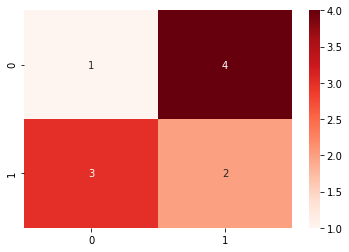

In [35]:
# 기본 클래스 y를 이용한 메소드를 살펴보자
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]
'''
0,0 : 1개
0,1 : 4개
1,0 : 3개
1,1 : 2개
'''
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(type(cm))

print(cm.flatten())  # 1차원으로 풀자
tn, fp, fn, tp = cm.flatten()
print(tn)
print(fp)
print(fn)
print(tp)

sns.heatmap(cm, annot=True, cmap='Reds')
# plt.savefig('confusion_matrix.png')

In [39]:
# 정답률 확인 accuracy_score()
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *

y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]

cm = confusion_matrix(y_true, y_pred)
print(cm)

res = accuracy_score(y_true, y_pred)
print(res)

# 재현율 확인 precision_score
pre = precision_score(y_true, y_pred)
print(pre)

# 재현율
recall = recall_score(y_true, y_pred)
print(recall)

[[1 4]
 [3 2]]
0.3
0.3333333333333333
0.4


In [44]:
# 정답률 확인 accuracy_score()
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *

y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]

cm = confusion_matrix(y_true, y_pred)
print(cm)

res = accuracy_score(y_true, y_pred)
print(res)

# 재현율 확인 precision_score
pre = precision_score(y_true, y_pred, pos_label=0)
print(pre)

# average = None : positive, negative 교체
pre = precision_score(y_true, y_pred, average=None)
print(pre)

# average = 'macro' : positive, negative 교체해서 두 값의 산술평균 값을 리턴
pre = precision_score(y_true, y_pred, average='macro')
print(pre)

# average = 'micro' : positive, negative 교체해서 각각의 상태에서 TP와 FP, FN의 적합률 등을 리턴
pre = precision_score(y_true, y_pred, average='micro')
print(pre)  # precision = TP / (TP + FP)   = (2+1) / ((2+!) + (4+3)) = 0.3

# 평가지표 산출률 classification_report()
print(classification_report(y_true, y_pred, target_names=['class_0', 'class_1']))

[[1 4]
 [3 2]]
0.3
0.25
[0.25       0.33333333]
0.29166666666666663
0.3
              precision    recall  f1-score   support

     class_0       0.25      0.20      0.22         5
     class_1       0.33      0.40      0.36         5

    accuracy                           0.30        10
   macro avg       0.29      0.30      0.29        10
weighted avg       0.29      0.30      0.29        10



In [53]:
# 프린트를 예쁘게
import pprint

d = classification_report(y_true, y_pred, output_dict=True)
pprint.pprint(d)

print(d['0'])
print(d['0']['precision'], type(d['0']['precision']))

{'0': {'f1-score': 0.22222222222222224,
       'precision': 0.25,
       'recall': 0.2,
       'support': 5},
 '1': {'f1-score': 0.3636363636363636,
       'precision': 0.3333333333333333,
       'recall': 0.4,
       'support': 5},
 'accuracy': 0.3,
 'macro avg': {'f1-score': 0.29292929292929293,
               'precision': 0.29166666666666663,
               'recall': 0.30000000000000004,
               'support': 10},
 'weighted avg': {'f1-score': 0.29292929292929293,
                  'precision': 0.29166666666666663,
                  'recall': 0.3,
                  'support': 10}}
{'precision': 0.25, 'recall': 0.2, 'f1-score': 0.22222222222222224, 'support': 5}
0.25 <class 'float'>


In [55]:
# 판다스
print(type(d))
import pandas as pd
df = pd.DataFrame(d)
df

<class 'dict'>


,0,1,accuracy,macro avg,weighted avg
precision,0.250000,0.333333,0.3,0.291667,0.291667
recall,0.200000,0.400000,0.3,0.300000,0.300000
f1-score,0.222222,0.363636,0.3,0.292929,0.292929
support,5.000000,5.000000,0.3,10.000000,10.000000


In [57]:
print(df.iloc[:,:-3])
print(df.iloc[:,-3:])

                  0         1
precision  0.250000  0.333333
recall     0.200000  0.400000
f1-score   0.222222  0.363636
support    5.000000  5.000000
           accuracy  macro avg  weighted avg
precision       0.3   0.291667      0.291667
recall          0.3   0.300000      0.300000
f1-score        0.3   0.292929      0.292929
support         0.3  10.000000     10.000000


In [59]:
# 연산해보자
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *

y_true_m = [0,0,0,1,1,1,2,2,2]
y_pred_m = [0,1,1,1,1,2,2,2,2]

print(confusion_matrix(y_true_m, y_pred_m))
print(precision_score(y_true_m, y_pred_m, average=None))
print(precision_score(y_true_m, y_pred_m, average='macro'))
print(precision_score(y_true_m, y_pred_m, average='micro'))
print(precision_score(y_true_m, y_pred_m, average='weighted'))
print(classification_report(y_true_m, y_pred_m))

[[1 2 0]
 [0 2 1]
 [0 0 3]]
[1.   0.5  0.75]
0.75
0.6666666666666666
0.75
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      0.67      0.57         3
           2       0.75      1.00      0.86         3

    accuracy                           0.67         9
   macro avg       0.75      0.67      0.64         9
weighted avg       0.75      0.67      0.64         9



In [66]:
# sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
import numpy as np
from sklearn.model_selection import train_test_split

a = np.arange(10)
print(a)

print(train_test_split(a))
print(type(train_test_split(a)))
print(len(train_test_split(a)))

# 1) 데이터 분철
a_train, a_test = train_test_split(a)
print(a_train)
print(a_test)

print('=======================================================================')
# 2) 비율 지정, tsst_size, train_size = 0.25 -> 10*0.25 = 2.5 -> 3 (0.0~1.0) or 개수
a_train, a_test = train_test_split(a, test_size=0.25)
print(a_train)
print(a_test)

print('=======================================================================')
# 3) 비율 지정, tsst_size, train_size = 0.25 -> 10*0.25 = 2.5 
a_train, a_test = train_test_split(a, train_size=0.25)  # train은 소수이하 절삭  10*0.25 = 2.5 -> 2
print(a_train)
print(a_test)

[0 1 2 3 4 5 6 7 8 9]
[array([5, 3, 0, 4, 1, 6, 7]), array([2, 9, 8])]
<class 'list'>
2
[1 0 6 4 5 3 8]
[9 2 7]
[4 7 1 2 0 3 6]
[5 9 8]
[1 6]
[4 2 0 8 9 7 5 3]


In [67]:
# 4) 비율값 확인
a_train, a_test = train_test_split(a, train_size=0.4, test_size=0.3)
print(a_train)
print(a_test)

[9 0 6 5]
[4 3 7]
